# Übungsblatt 7
----------------------
## **Aufgabe 32 f)**
Zeichnen Sie das auf $D_e$ normierte Morse-Potential $\frac{V(r)}{D_e} $ von $150$ pm bis $800$ pm mit $r_{eq} = 236,7$ pm.


$V(r) = D_e \left(1-e^{-a\left(r-r_{eq}\right)}\right)^2$
$\Rightarrow \frac{V(r)}{D_e} = \left(1-e^{-a\left(r-r_{eq}\right)}\right)^2$

Importieren der üblichen Module:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

Hier die in den vorhergegangenen Aufgaben errechneten Werte "importieren"

In [2]:
#hier die Konstanten
a = 9146610632      #in m^-1
r0 = 236.7e-12      #in Meter
D_e = 3.08205e-19   #Joule
gamma = 0.015105    #Einheitenlos


Definiere das Morse-Potential nomiert auf $D_e$ -> $\frac{V(r)}{D_e}$:


In [3]:
def Norm_Morse(r):
    # r in pm Übergeben, wird in der Funktion in Meter umgerechnet.
    return (1-np.exp(-a*(r * 1e-12 - r0)))**2

 Definiere $r$ von $100$ pm bis $800$ pm und plotten, sowie die Linie für den Gleichgewichtsabstand hinzufügen und den Graphen scalieren. $100$ pm wurde gewählt, weil es besser aussieht.

In [4]:
# r festlegen
r = np.arange(100,800, 0.1)

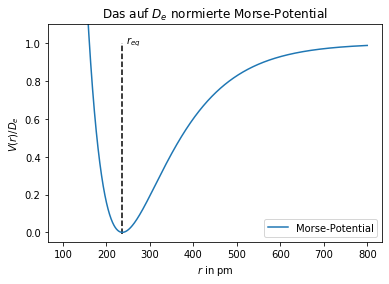

In [5]:
# Graph plotten
plt.plot(r,Norm_Morse(r),label="Morse-Potential")
# Achsen beschriften
plt.xlabel("$r$ in pm")
plt.ylabel("$V(r)/D_e $")
# r_eq Linie einzeichnen und beschriften
plt.vlines(236.7,-0.01,1, linestyles='dashed')
plt.text(245,1,"$r_{eq}$")
# Graphen scalieren
plt.ylim(-0.05,1.1)

#Title
plt.title("Das auf $D_e$ normierte Morse-Potential")
plt.legend()
plt.show()

## h)

Das Morse-Potential kann durch das harmonische Potential genähert werden:

$V(r) = \frac{1}{2}k\left(r-r_{eq}\right)^2$ mit $k=2a^2D_e$

Auch diess Potential muss wieder auf $D_e$ normiert werden:

$\frac{V(r)}{D_e} = a^2\left(r-r_{eq}\right)^2$

Im Folgenden wird das harm. Potential definiert und geplottet:


In [6]:
def Norm_harm(r):
    # r in pm übergeben, wird in Funktion in Meter umgerechnet
    return a**2 * (r * 1e-12 - r0)**2

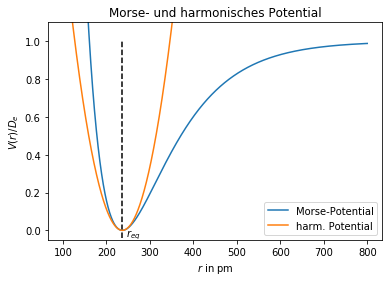

In [7]:
# Graphen plotten
plt.plot(r,Norm_Morse(r),label="Morse-Potential")
plt.plot(r,Norm_harm(r), label="harm. Potential")
# Achsen beschriften
plt.xlabel("$r$ in pm")
plt.ylabel("$V(r)/D_e $")
# r_eq Linie einzeichnen und beschriften
plt.vlines(236.7,-0.04,1, linestyles='dashed')
plt.text(245,-0.03,"$r_{eq}$")
# Graphen scalieren
plt.ylim(-0.05,1.1)

plt.title("Morse- und harmonisches Potential")
plt.legend()
plt.show()

Zur besseren Sichtbarkeit des Bereiches, wo die Näherung gut ist, wird nochmal der Bereich um $r_{eq}$ gezeigt.

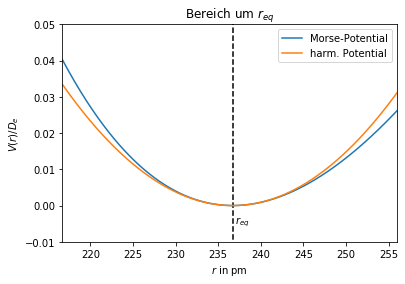

In [8]:

# Graphen plotten
plt.plot(r,Norm_Morse(r),label="Morse-Potential")
plt.plot(r,Norm_harm(r), label="harm. Potential")
# Achsen beschriften
plt.xlabel("$r$ in pm")
plt.ylabel("$V(r)/D_e $")
# r_eq Linie einzeichnen und beschriften
plt.vlines(236.7,-0.04,1, linestyles='dashed')
plt.text(237,-0.005,"$r_{eq}$")
# Graphen scalieren
plt.ylim(-0.01,0.05)
plt.xlim(216.7,256,7)

plt.title("Bereich um $r_{eq}$")
plt.legend()
plt.show()

Die Energieniveaus des Morse-Potentials sind gegeben durch:

$E_v = h\nu \left( v + \frac{1}{2} \right) - \gamma h \nu \left(v + \frac{1}{2} \right)^2 $

$h\nu = E $ haben wir schon in Teil a) berechnet. Auch die Energieniveaus müssen auf $D_e$ normiert werden:

$ \frac{E_v}{D_e} = \frac{h \nu}{D_e} \left( v + \frac{1}{2} \right) - \gamma \frac{h \nu}{D_e} \left(v + \frac{1}{2} \right)^2= \frac{E}{D_e} \left( v + \frac{1}{2} \right) - \gamma \frac{E}{D_e} \left(v + \frac{1}{2} \right)^2$


In [9]:
# Zunächst E aus a) "importieren"
E = 1.86192555e-20 # in Joule
# Funktion für die Energieniveaus des Morse-Potentials:
def morse_niv (v):
    return E/D_e * (v+0.5) - gamma * E/D_e * (v + 0.5)**2

Für die Energieniveaus des harmonischen Potentials gilt:

$E_n =\hbar \omega \left(n+ \frac{1}{2}\right) = h\nu\left(n+ \frac{1}{2}\right) $

Auch hier wird auf $D_e$ normiert und wie oben $E = h\nu$ eingesetzt:

$\frac{E_n}{D_e} = \frac{h\nu}{D_e}\left(n+ \frac{1}{2}\right) = \frac{E}{D_e}\left(n+ \frac{1}{2}\right) $

Dann wird das als Funktion implementiert:

In [10]:
def harm_niv(n):
    return E/D_e * (n + 0.5)

Das Folgende ist nur für die Länge der Niveaulinien, ist also nur für die Schönheit und nicht wichtig für das eigentliche Zeichnen. 

In [11]:
#Länge der Lininen im Morse-Potential
#Es wird jeweils für gegebenen Energie E die x-Achsenpostion r berechnet
def r_morse_minus(E):
    return r0 - np.log(np.sqrt(E)+1)/a
def r_morse_plus(E):
    return r0 - np.log(-np.sqrt(E)+1)/a

#Länge der Linien im harmonischen Potential
def r_harm_plus(E):
    return np.sqrt(E)/a + r0
def r_harm_minus(E):
    return r0 - np.sqrt(E)/a 

Dann werden für beide Potentiale die ersten vier Niveaus eingezeichnet:


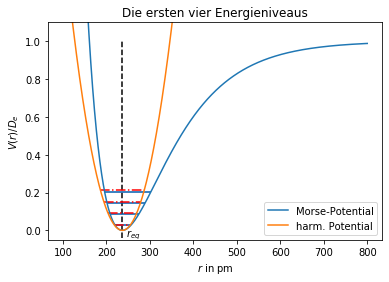

In [12]:
# Graphen plotten
plt.plot(r,Norm_Morse(r),label="Morse-Potential")
plt.plot(r,Norm_harm(r), label="harm. Potential")
# Achsen beschriften
plt.xlabel("$r$ in pm")
plt.ylabel("$V(r)/D_e $")
# r_eq Linie einzeichnen und beschriften
plt.vlines(236.7,-0.04,1, linestyles='dashed')
plt.text(245,-0.03,"$r_{eq}$")

for n in range(4):
    plt.hlines(morse_niv(n),r_morse_minus(morse_niv(n))/ 1e-12, r_morse_plus(morse_niv(n))/ 1e-12, linestyle="-", color="#005AAF")
    plt.hlines(harm_niv(n),r_harm_minus(harm_niv(n))/ 1e-12, r_harm_plus(harm_niv(n))/ 1e-12, linestyle="-.", color="red")
    
# Graphen scalieren
plt.ylim(-0.05,1.1)

plt.title("Die ersten vier Energieniveaus")
plt.legend()
plt.show()

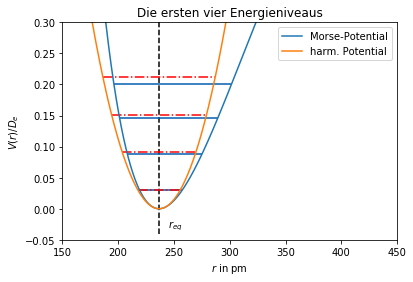

In [13]:
# Graphen plotten
plt.plot(r,Norm_Morse(r),label="Morse-Potential")
plt.plot(r,Norm_harm(r), label="harm. Potential")
# Achsen beschriften
plt.xlabel("$r$ in pm")
plt.ylabel("$V(r)/D_e $")
# r_eq Linie einzeichnen und beschriften
plt.vlines(236.7,-0.04,1, linestyles='dashed')
plt.text(245,-0.03,"$r_{eq}$")

for n in range(4):
    plt.hlines(morse_niv(n),r_morse_minus(morse_niv(n))/ 1e-12, r_morse_plus(morse_niv(n))/ 1e-12, linestyle="-", color="#005AAF")
    plt.hlines(harm_niv(n),r_harm_minus(harm_niv(n))/ 1e-12, r_harm_plus(harm_niv(n))/ 1e-12, linestyle="-.", color="red")
    
# Graphen scalieren
plt.ylim(-0.05, 0.3)
plt.xlim(150, 450)

plt.title("Die ersten vier Energieniveaus")
plt.legend()
plt.show()

Die ersten 30 Niveaus:

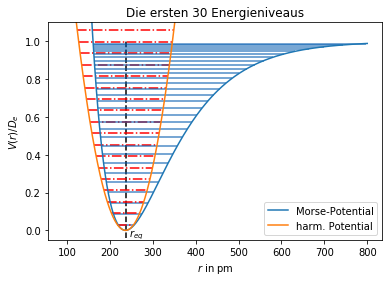

In [14]:
# Graphen plotten
plt.plot(r,Norm_Morse(r),label="Morse-Potential")
plt.plot(r,Norm_harm(r), label="harm. Potential")
# Achsen beschriften
plt.xlabel("$r$ in pm")
plt.ylabel("$V(r)/D_e $")
# r_eq Linie einzeichnen und beschriften
plt.vlines(236.7,-0.04,1, linestyles='dashed')
plt.text(245,-0.03,"$r_{eq}$")

for n in range(30):
    plt.hlines(morse_niv(n),r_morse_minus(morse_niv(n))/ 1e-12, r_morse_plus(morse_niv(n))/ 1e-12, linestyle="-", color="#005AAF", alpha = 0.7)
    plt.hlines(harm_niv(n),r_harm_minus(harm_niv(n))/ 1e-12, r_harm_plus(harm_niv(n))/ 1e-12, linestyle="-.", color="red")
    
# Graphen scalieren
plt.ylim(-0.05,1.1)


plt.title("Die ersten 30 Energieniveaus")
plt.legend()
plt.show()